# Clustering Techniques on Customer Dataset

## Data Preparation

In [1]:
### Data Wrangling

import numpy as np
import pandas as pd
import missingno
from collections import Counter

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from tabulate import tabulate

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [3]:
### Fetching the datsets

dataset = pd.read_csv('../input/credit-card-customer-data/Credit Card Customer Data.csv')

#### First few rows of dataset

In [6]:
### Looking at the sample records of the dataset

dataset.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


#### Shape of dataset

In [7]:
dataset.shape

(660, 7)

The dataset consists of 7 columns and 660 rows.

## Exploratory Data Analysis (EDA)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


Here, we can see that there are no missing values in the columns.

<AxesSubplot:>

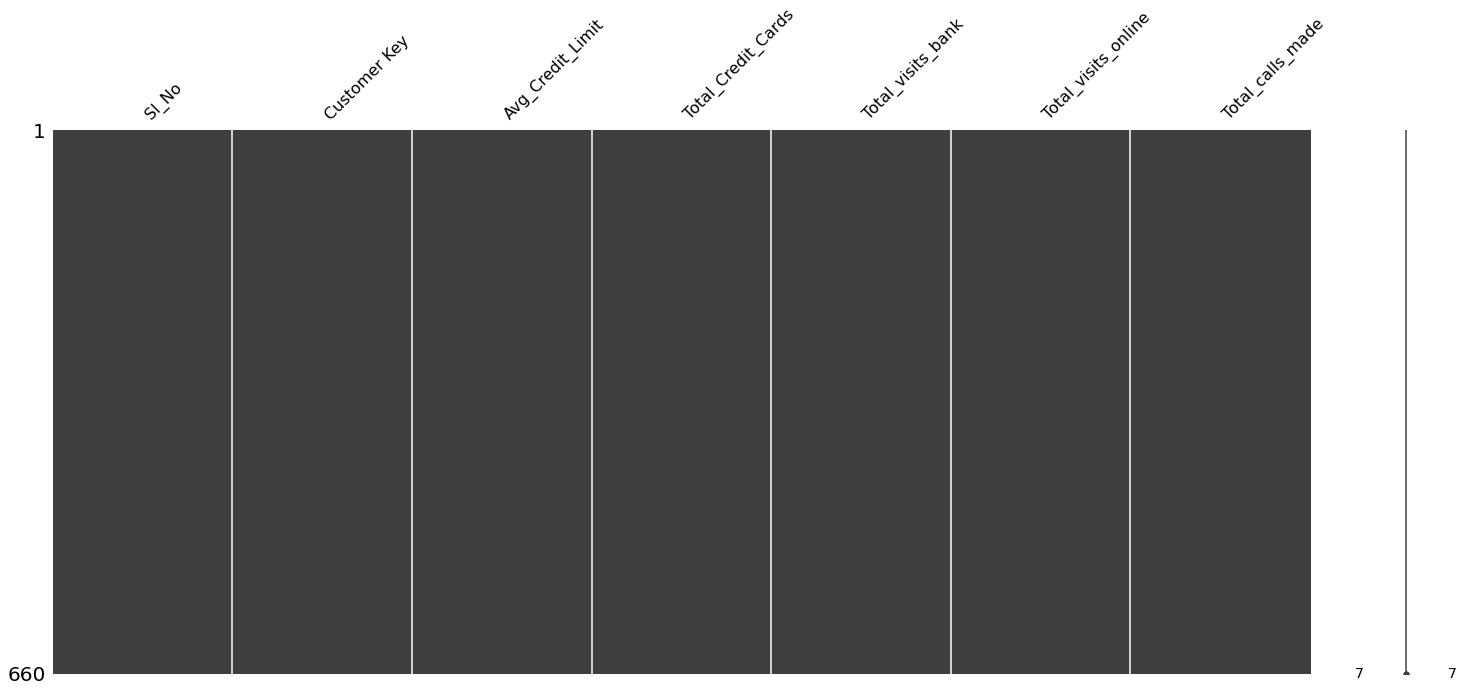

In [9]:
### Visual representation of the missing data in the dataset

missingno.matrix(dataset)

In [10]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


#### Feature Analysis

In [11]:
### Understanding the distribution of the numerical column

def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

##### Plotting graphs

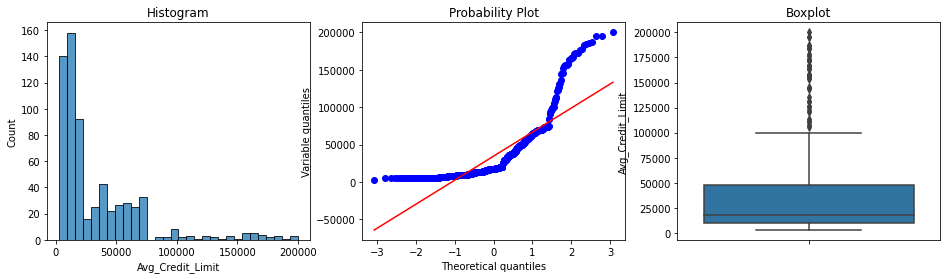

In [12]:
### Understanding the distribution of the column - Avg_Credit_Limit

diagnostic_plots(dataset, 'Avg_Credit_Limit')

From the above graphs, we can see that the data is skewed and has outliers.

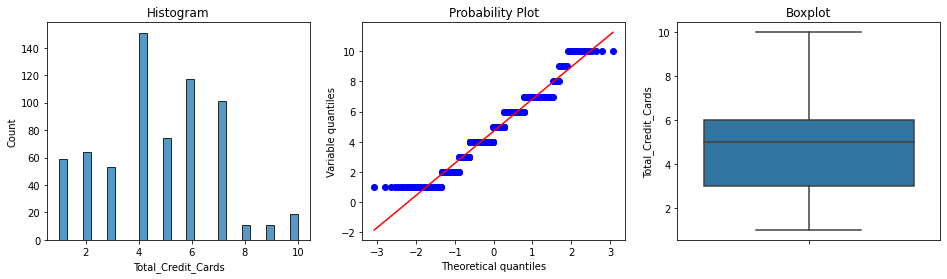

In [13]:
### Understanding the distribution of the column - Total_Credit_Cards

diagnostic_plots(dataset, 'Total_Credit_Cards')

From the above graphs, we can see that the data is discrete and has no outliers.

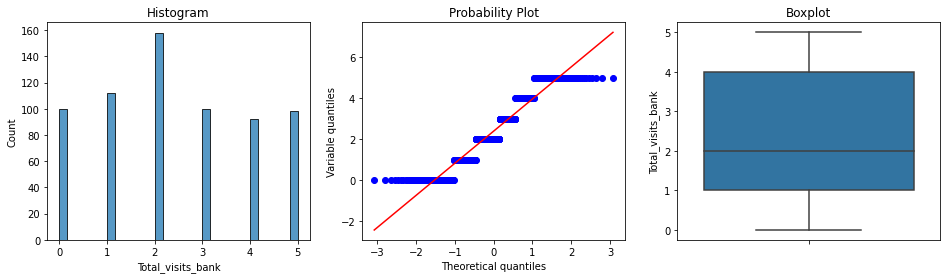

In [14]:
### Understanding the distribution of the column - Total_visits_bank

diagnostic_plots(dataset, 'Total_visits_bank')

From the above graphs, we can see that the data is discrete and has no outliers.

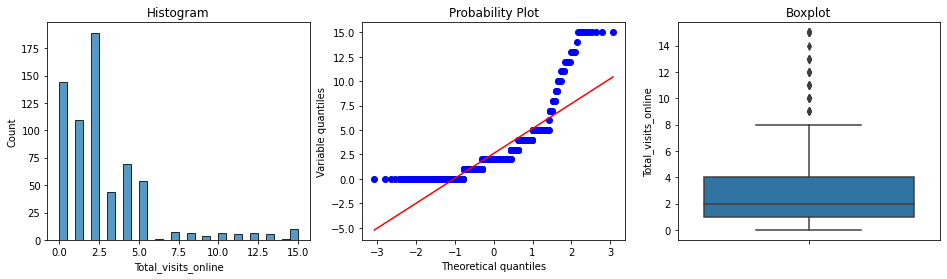

In [15]:
### Understanding the distribution of the column - Total_visits_online

diagnostic_plots(dataset, 'Total_visits_online')

From the above graphs, we can see that the data is discrete and has a few outliers.

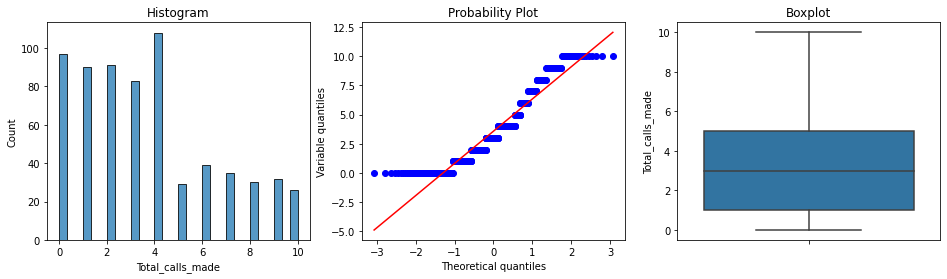

In [16]:
### Understanding the distribution of the column - Total_calls_made

diagnostic_plots(dataset, 'Total_calls_made')

From the above graphs, we can see that the data is discrete and has no outliers.

## Data preprocessing

#### Drop unnecessary columns

In [17]:
### Dropping the columns - Sl_No

dataset.drop(['Sl_No'], axis = 1, inplace = True)

In [18]:
### Looking at the sample records of the dataset

dataset.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
5,58634,20000,3,0,1,8
6,48370,100000,5,0,11,2
7,37376,15000,3,0,1,1
8,82490,5000,2,0,2,2
9,44770,3000,4,0,1,7


#### Detect and remove outliers in numerical variables

In [19]:
### Function to fetch censoring or capping boundaries

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [20]:
### Find limits for Avg_Credit_Limit

credit_upper_limit, credit_lower_limit = find_skewed_boundaries(dataset, 'Avg_Credit_Limit', 1.5)
credit_upper_limit, credit_lower_limit

(105000.0, -47000.0)

In [21]:
### Find limits for Total_visits_online

online_upper_limit, online_lower_limit = find_skewed_boundaries(dataset, 'Total_visits_online', 1.5)
online_upper_limit, online_lower_limit

(8.5, -3.5)

In [22]:
### Now let's replace the outliers by the maximum and minimum limit -> Avg_Credit_Limit

dataset['Avg_Credit_Limit']= np.where(dataset['Avg_Credit_Limit'] > credit_upper_limit, credit_upper_limit,
                       np.where(dataset['Avg_Credit_Limit'] < credit_lower_limit, credit_lower_limit, 
                                dataset['Avg_Credit_Limit']))

In [23]:
### Now let's replace the outliers by the maximum and minimum limit -> Total_visits_online

dataset['Total_visits_online']= np.where(dataset['Total_visits_online'] > online_upper_limit, online_upper_limit,
                       np.where(dataset['Total_visits_online'] < online_lower_limit, online_lower_limit,
                                dataset['Total_visits_online']))

Now, lets look at the distribution of these two columns after capping.

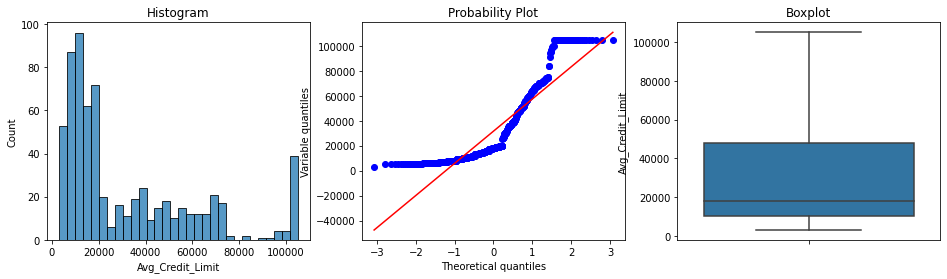

In [24]:
### Understanding the modified distribution of the column - Avg_Credit_Limit

diagnostic_plots(dataset, 'Avg_Credit_Limit')

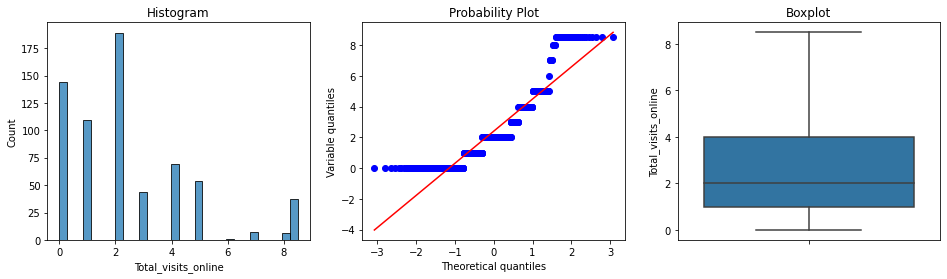

In [25]:
### Understanding the modified distribution of the column - Total_visits_online

diagnostic_plots(dataset, 'Total_visits_online')

Now, we can see that the outliers are removed from the columns.

## Segmentation using Clustering

In [26]:
### Filtering the average credit limit, total credit cards, total bank visits from the dataset

X = dataset[['Avg_Credit_Limit', 'Total_visits_bank', 'Total_Credit_Cards']].iloc[:, :].values

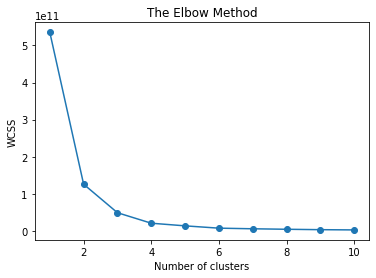

In [27]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the optimal number of clusters are 3.

In [28]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

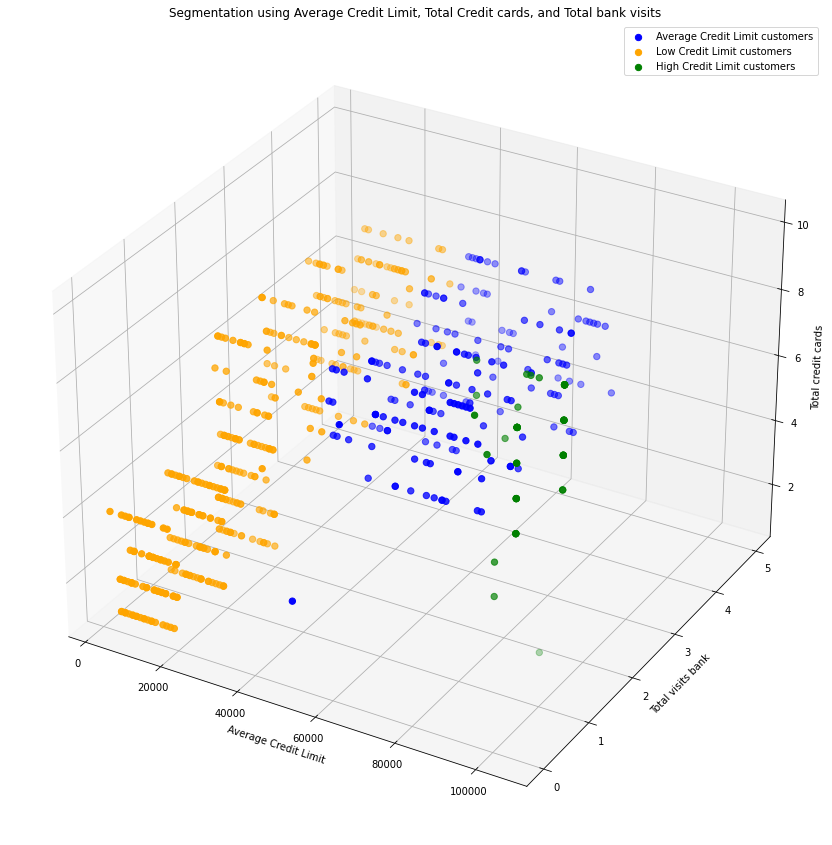

In [29]:
### Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 40 , color = 'blue', 
           label = "Average Credit Limit customers")
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 40 , color = 'orange', 
           label = "Low Credit Limit customers")
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40 , color = 'green', 
           label = "High Credit Limit customers")
plt.title('Segmentation using Average Credit Limit, Total Credit cards, and Total bank visits')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total visits bank')
ax.set_zlabel('Total credit cards')
ax.legend()
plt.show()

From the above graph, we can see that there are 3 clusters.

1. Low Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a low credit limit. The customers with few credit cards visit the bank lesser times than those who have more credit cards.
2. Average Credit Limit customers: From the above graph, we can see that the customers present in this cluster have an average credit limit. Most of the customers irrespective of the number of credit cards they have go to the bank more number of times.
3. High Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a high credit limit. These customers have less than 5 credit cards and visit the bank atleast three times.

In [30]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.73
Calinski Harabasz Score : 3254.49


#### Segmentation using Average Credit Limit, Total Credit cards, and Total bank visits (Hierarchial clustering)

In [31]:
### Filtering the average credit limit, total credit cards, total bank visits from the dataset

X = dataset[['Avg_Credit_Limit', 'Total_visits_bank', 'Total_Credit_Cards']].iloc[:, :].values

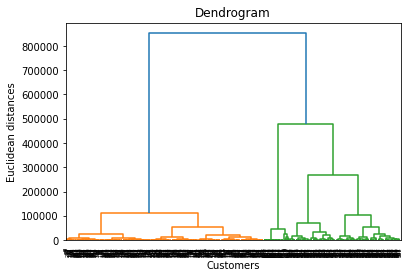

In [32]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From the above graph, we can see that the optimal number of clusters are 2.

In [33]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

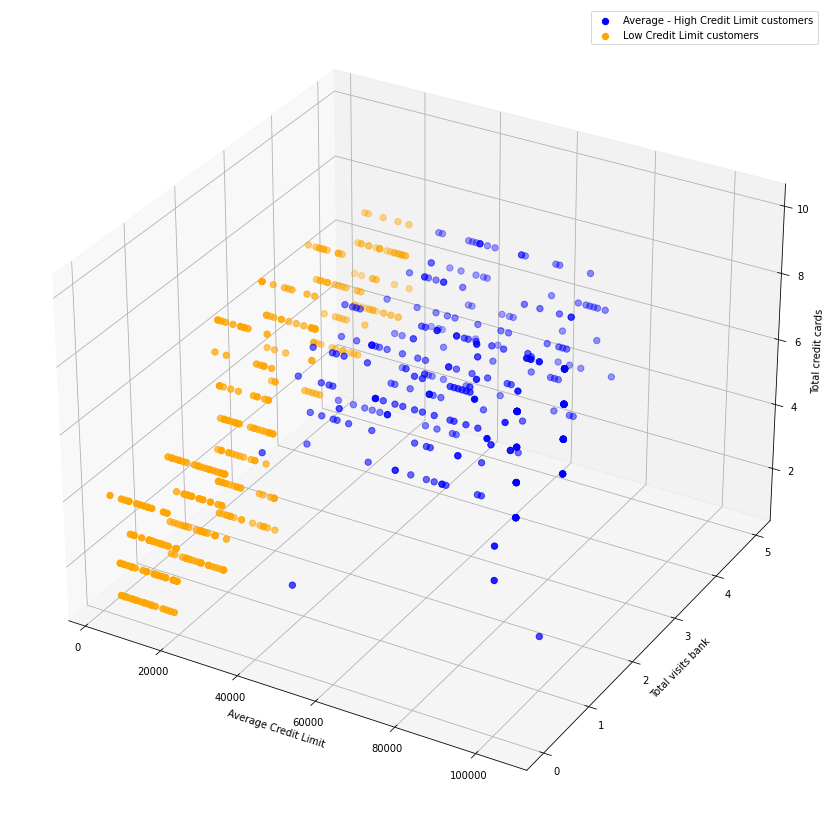

In [34]:
### Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0, 2], s = 40 , color = 'blue',
           label = "Average - High Credit Limit customers")
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1, 2], s = 40 , color = 'orange',
           label = "Low Credit Limit customers")
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total visits bank')
ax.set_zlabel('Total credit cards')
ax.legend()
plt.show()

From the above graph, we can see that there are 2 clusters.

1. Low Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a low credit limit. The customers with few credit cards visit the bank lesser times than those who have more credit cards.
2. Average - High Credit Limit customers: From the above graph, we can see that the customers present in this cluster have an average to high credit limit (that is more than 20000). Most of the customers irrespective of the number of credit cards they have go to the bank more number of times.

In [35]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.65
Calinski Harabasz Score : 1400.29


In [36]:
### Tabulating the results

table = []
print('Segmentation using Average Credit Limit, Total Credit cards, and Total bank visits')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Average Credit Limit, Total Credit cards, and Total bank visits
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.73 │                   3254.49 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.65 │                   1400.29 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score and Calinski Harabasz score.

#### Segmentation using Average Credit Limit, Total Credit cards, and Total visits online (K-Means)

In [37]:
### Filtering the average credit limit, total credit cards, total online visits from the dataset

X = dataset[['Avg_Credit_Limit', 'Total_visits_online', 'Total_Credit_Cards']].iloc[:, :].values

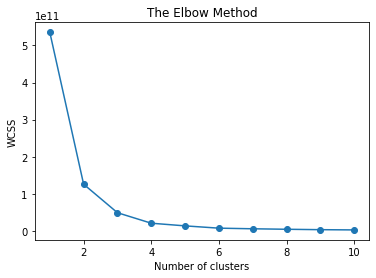

In [38]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the optimal number of clusters are 3.

In [39]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

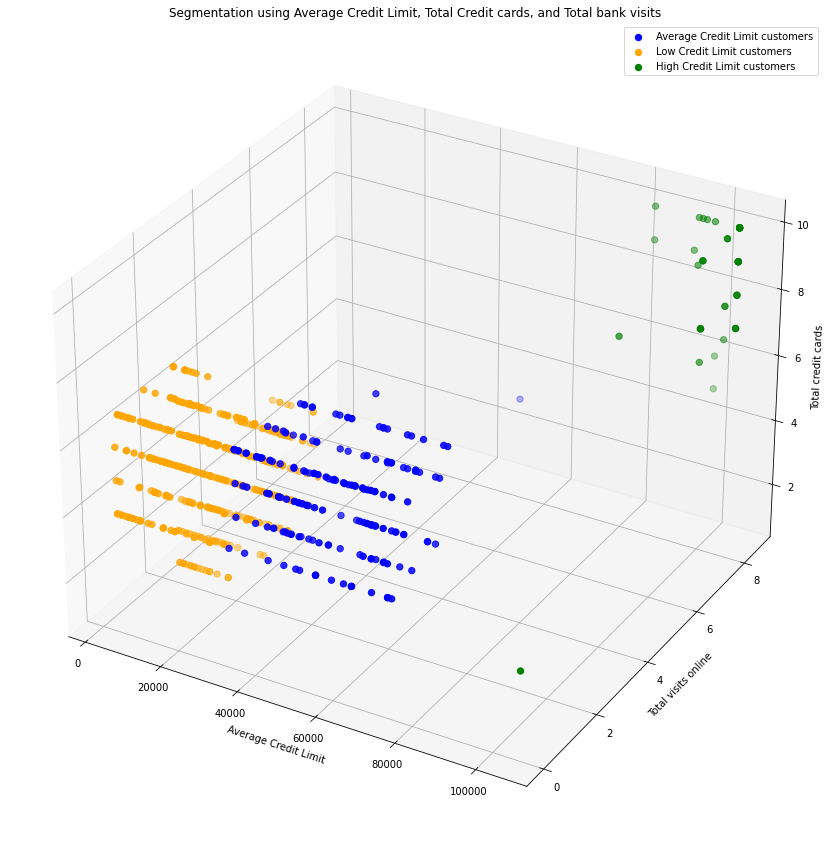

In [40]:
### Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 40 , color = 'blue', 
           label = "Average Credit Limit customers")
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 40 , color = 'orange', 
           label = "Low Credit Limit customers")
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40 , color = 'green', 
           label = "High Credit Limit customers")
plt.title('Segmentation using Average Credit Limit, Total Credit cards, and Total bank visits')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total visits online')
ax.set_zlabel('Total credit cards')
ax.legend()
plt.show()

From the above graph, we can see that there are 3 clusters.

1. Low Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a low credit limit. These customers have low to medium average online visits and have low to medium number of credit cards.
2. Average Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a medium credit limit. These customers have low to medium average online visits and have low to medium number of credit cards.
3. High Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a high credit limit. Most of these customers have many credit cards and regularly use online mode for visting the bank.

In [41]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.73
Calinski Harabasz Score : 3254.49


#### Segmentation using Average Credit Limit, Total Credit cards, and Total visits online (Hierarchial clustering)

In [42]:
### Filtering the average credit limit, total credit cards, total online visits from the dataset

X = dataset[['Avg_Credit_Limit', 'Total_visits_online', 'Total_Credit_Cards']].iloc[:, :].values

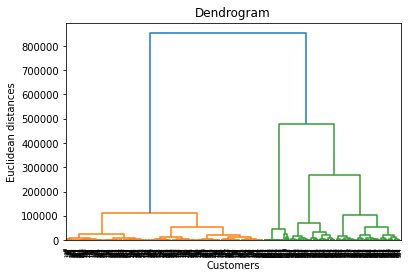

In [43]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From the above graph, we can see that the optimal number of clusters are 2.

In [44]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

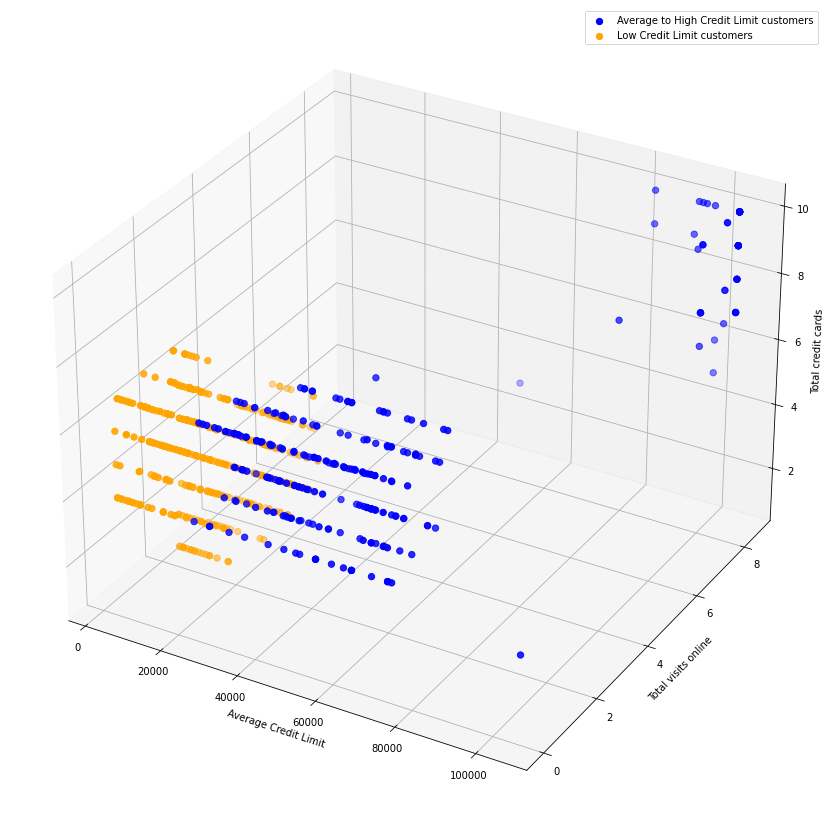

In [45]:
### Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0, 2], s = 40 , color = 'blue',
           label = "Average to High Credit Limit customers")
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1, 2], s = 40 , color = 'orange',
           label = "Low Credit Limit customers")
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total visits online')
ax.set_zlabel('Total credit cards')
ax.legend()
plt.show()

From the above graph, we can see that there are 2 clusters.

1. Low Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a low credit limit. These customers have low to medium average online visits and have low to medium number of credit cards.
2. Average to High Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a medium to high credit limit. The customers having less number of credit cards have medium number of online visits and the customers having more number of credit cards have high online visits.

In [46]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.65
Calinski Harabasz Score : 1400.29


In [47]:
### Tabulating the results

table = []
print('Segmentation using Average Credit Limit, Total Credit cards, and Total visits online')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Average Credit Limit, Total Credit cards, and Total visits online
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.73 │                   3254.49 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.65 │                   1400.29 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


From the above table, we can see that K-Means performs better than Hierarchial clustering on comparing the Silhouette score and Calinski Harabasz score.

## RFM Analysis

#### Calculating Recency

Here, since there is no specific column to mention the time of the most frequent visit. Let's assume that the data is filtered based on most recent visit. So, let's give an arbitrary value of 10 to recency.

In [48]:
### Calculating Recency

recency_data = pd.DataFrame()
recency_data['Customer Key'] = dataset['Customer Key']
recency_data['Recency'] = [10] * len(recency_data)

### Dropping the duplicate records

recency_data = recency_data.drop_duplicates(subset = "Customer Key")

In [49]:
### Looking at the records of the recency_data

recency_data

,Customer Key,Recency
0,87073,10
1,38414,10
2,17341,10
3,40496,10
4,47437,10
...,...,...
655,51108,10
656,60732,10
657,53834,10
658,80655,10


#### Calculating Frequency

We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company. Here, we will use the metric Total_visits_bank + Total_visits_online + Total_calls_made to calculate frequency.

In [50]:
### Calculating Frequency

frequency_data = pd.DataFrame()
frequency_data['Customer Key'] = dataset['Customer Key']
frequency_data['Frequency'] = dataset['Total_visits_bank'] + dataset['Total_visits_online'] + dataset['Total_calls_made']

### Dropping the duplicate records

frequency_data = frequency_data.drop_duplicates(subset = "Customer Key")

In [51]:
### Looking at the records of the frequency_data

frequency_data

,Customer Key,Frequency
0,87073,2.0
1,38414,17.5
2,17341,8.0
3,40496,6.0
4,47437,11.5
...,...,...
655,51108,9.5
656,60732,11.5
657,53834,10.5
658,80655,9.5


#### Calculating Monetary

Here we are calculating the monetary value of customer using the column Avg_Credit_Limit.

In [70]:
### Calculating Monetary

monetary_data = pd.DataFrame()
monetary_data['Customer Key'] = dataset['Customer Key']
monetary_data['Monetary'] = dataset['Avg_Credit_Limit']

### Dropping the duplicate records

monetary_data = monetary_data.drop_duplicates(subset = "Customer Key")

In [71]:
### Looking at the records of the monetary_data

monetary_data

,Customer Key,Monetary
0,87073,100000.0
1,38414,50000.0
2,17341,50000.0
3,40496,30000.0
4,47437,100000.0
...,...,...
655,51108,99000.0
656,60732,84000.0
657,53834,105000.0
658,80655,105000.0


#### Calculating RFM Score

In [72]:
### Merging all three dataframes into one

recency_frequency_data = recency_data.merge(frequency_data, on = 'Customer Key')
merged_data = recency_frequency_data.merge(monetary_data, on = 'Customer Key')

In [73]:
### Looking at the records of the merged_data

merged_data

,Customer Key,Recency,Frequency,Monetary
0,87073,10,2.0,100000.0
1,38414,10,17.5,50000.0
2,17341,10,8.0,50000.0
3,40496,10,6.0,30000.0
4,47437,10,11.5,100000.0
...,...,...,...,...
650,51108,10,9.5,99000.0
651,60732,10,11.5,84000.0
652,53834,10,10.5,105000.0
653,80655,10,9.5,105000.0


In [74]:
### Ranking Customer’s based upon their recency, frequency, and monetary score

merged_data['R_rank'] = merged_data['Recency'].rank(ascending = False)
merged_data['F_rank'] = merged_data['Frequency'].rank(ascending = True)
merged_data['M_rank'] = merged_data['Monetary'].rank(ascending = True)

In [75]:
### Looking at the records of the merged_data

merged_data

,Customer Key,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,87073,10,2.0,100000.0,328.0,6.5,616.0
1,38414,10,17.5,50000.0,328.0,655.0,503.5
2,17341,10,8.0,50000.0,328.0,315.0,503.5
3,40496,10,6.0,30000.0,328.0,159.0,408.5
4,47437,10,11.5,100000.0,328.0,546.0,616.0
...,...,...,...,...,...,...,...
650,51108,10,9.5,99000.0,328.0,423.5,614.0
651,60732,10,11.5,84000.0,328.0,546.0,606.5
652,53834,10,10.5,105000.0,328.0,499.0,636.5
653,80655,10,9.5,105000.0,328.0,423.5,636.5


In [76]:
### Normalizing the rank of the customers

merged_data['R_rank_norm'] = (merged_data['R_rank'] / merged_data['R_rank'].max())*100
merged_data['F_rank_norm'] = (merged_data['F_rank'] / merged_data['F_rank'].max())*100
merged_data['M_rank_norm'] = (merged_data['F_rank'] / merged_data['M_rank'].max())*100
 
merged_data.drop(columns = ['R_rank', 'F_rank', 'M_rank'], inplace = True)

In [79]:
### Looking at the records of the merged_data

merged_data

,Customer Key,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,87073,10,2.0,100000.0,100.0,0.992366,1.021210
1,38414,10,17.5,50000.0,100.0,100.000000,102.906520
2,17341,10,8.0,50000.0,100.0,48.091603,49.489395
3,40496,10,6.0,30000.0,100.0,24.274809,24.980361
4,47437,10,11.5,100000.0,100.0,83.358779,85.781618
...,...,...,...,...,...,...,...
650,51108,10,9.5,99000.0,100.0,64.656489,66.535742
651,60732,10,11.5,84000.0,100.0,83.358779,85.781618
652,53834,10,10.5,105000.0,100.0,76.183206,78.397486
653,80655,10,9.5,105000.0,100.0,64.656489,66.535742


In [80]:
### Calculating RFM score

merged_data['RFM Score'] = 0.15 * merged_data['R_rank_norm'] + 0.28 * merged_data['F_rank_norm'] + 0.57 * merged_data['M_rank_norm']

### Scaling the RFM Score to a scale of 5

merged_data['RFM Score'] *= 0.05

### Fetching the final data

final_data = merged_data[['Customer Key', 'RFM Score']]

In [81]:
### Looking at the sample records of the final data

final_data.head(10)

,Customer Key,RFM Score
0,87073,0.792998
1,38414,5.082836
2,17341,2.833730
3,40496,1.801788
4,47437,4.361799
5,58634,3.326549
6,48370,4.050893
7,37376,0.792998
8,82490,1.064213
9,44770,2.833730


Now, we rate the customer based on the RFM score. Here, we will use the following scale to rate the customers based on the RFM score.

1. RFM Score > 4.5 : Top Customer
2. 4.5 > RFM Score > 4 : High Value Customer
3. 4 > RFM Score > 3 : Medium value customer
4. 3 > RFM Score > 1.6 : Low-value customer
5. RFM Score < 1.6 : Lost Customer

In [82]:
### Finding out the customer segment using the above scale

final_data["Customer Segment"] = np.where(final_data['RFM Score'] > 4.5, "Top Customers", 
                                           (np.where(final_data['RFM Score'] > 4, "High value Customer", 
                                                     (np.where(final_data['RFM Score'] > 3, "Medium Value Customer", 
                                                               np.where(final_data['RFM Score'] > 1.6, 'Low Value Customers', 
                                                                        'Lost Customers'))))))
final_data

,Customer Key,RFM Score,Customer Segment
0,87073,0.792998,Lost Customers
1,38414,5.082836,Top Customers
2,17341,2.833730,Low Value Customers
3,40496,1.801788,Low Value Customers
4,47437,4.361799,High value Customer
...,...,...,...
650,51108,3.551459,Medium Value Customer
651,60732,4.361799,High value Customer
652,53834,4.050893,High value Customer
653,80655,3.551459,Medium Value Customer


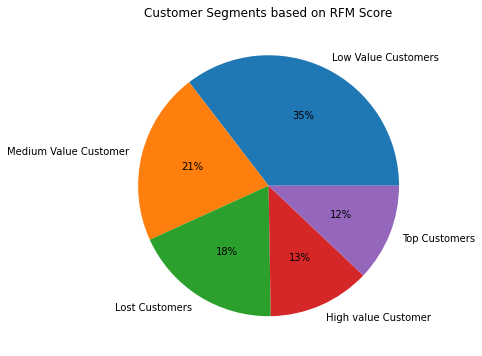

In [83]:
### Visualizing the customer segments

plt.figure(figsize = (6, 6))
plt.pie(final_data['Customer Segment'].value_counts(), labels = final_data['Customer Segment'].value_counts().index,
        autopct = '%.0f%%')
plt.title('Customer Segments based on RFM Score')
plt.show()

## Conclusion

Here the K-Means clustering model helps us in better understanding the credit card customer segmentation than compared to the Hierarchial clustering model. Also, to better understand the value a customer brings to the organization, we used RFM analysis to segment the data accordingly.